In [1]:
import numpy
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit import IBMQ, Aer
from math import pi
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram
#provider = IBMQ.enable_account ('ca11f5d389b8c2c86914de9b6159e4d24496ff6e237bb8e57b2b3fce845a084cd3558138208942d5691163461064f7d4de59490006743ea3e930335923a30f55')
# Create a Quantum Register with 2 qubits.
provider = IBMQ.load_account()

C:\Users\PRANAV\Anaconda3\lib\site-packages\qiskit\providers\models\backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


In [103]:
alpha = [0,pi/8, pi/4, 3*pi/8, pi/2]
phi = np.arange(0,21*pi/10,pi/10)
#alpha1, phi1 =np.meshgrid(alpha,phi)
phi1, alpha1 = np.meshgrid(phi, alpha)
X = alpha1
Y = phi1

count_list1=[]
count_list=[]

for x in alpha:
    for y in np.arange(0,21*pi/10,pi/10):
        c = ClassicalRegister (2, 'c')
        q = QuantumRegister(3, 'q')
        qc = QuantumCircuit(q,c)
        qc.h(q[1])
        qc.cx(q[1],q[2])
        qc.h(q[0])
        qc.u3(2*x,pi,pi,q[2])
        qc.u1(y,q[0])
        qc.ch(q[1],q[0])
        qc.measure(q[0], c[0])
        qc.measure(q[2], c[1])
        #backend = provider.get_backend('ibmq_qasm_simulator')
        backend = Aer.get_backend('qasm_simulator')
        shots=8192
        # Compile and run the Quantum Program on a real device backend
        job_exp = execute(qc, backend=backend)
        result = job_exp.result()
        counts=result.get_counts(qc)
        if '00' in list(counts):
            count_list1.append(counts['00']/shots)
        else:
            count_list.append(0)
    count_list.append(count_list1)
    print(count_list)
    count_list1=[]
    
#count_list = np.asarray(count_list, count_list, dtype=np.float32)
       

[[0.031494140625, 0.0294189453125, 0.0338134765625, 0.0328369140625, 0.03173828125, 0.03466796875, 0.0318603515625, 0.03076171875, 0.030029296875, 0.03173828125, 0.0306396484375, 0.03125, 0.029541015625, 0.0283203125, 0.0323486328125, 0.0302734375, 0.028564453125, 0.028564453125, 0.0333251953125, 0.0330810546875, 0.031494140625]]
[[0.031494140625, 0.0294189453125, 0.0338134765625, 0.0328369140625, 0.03173828125, 0.03466796875, 0.0318603515625, 0.03076171875, 0.030029296875, 0.03173828125, 0.0306396484375, 0.03125, 0.029541015625, 0.0283203125, 0.0323486328125, 0.0302734375, 0.028564453125, 0.028564453125, 0.0333251953125, 0.0330810546875, 0.031494140625], [0.037841796875, 0.037109375, 0.034912109375, 0.034912109375, 0.0345458984375, 0.031982421875, 0.029541015625, 0.024658203125, 0.0286865234375, 0.0279541015625, 0.0247802734375, 0.02734375, 0.0244140625, 0.031005859375, 0.02685546875, 0.031005859375, 0.0330810546875, 0.0361328125, 0.033203125, 0.0367431640625, 0.038330078125]]
[[0.031

TypeError: asarray() got multiple values for argument 'dtype'

ValueError: setting an array element with a sequence.

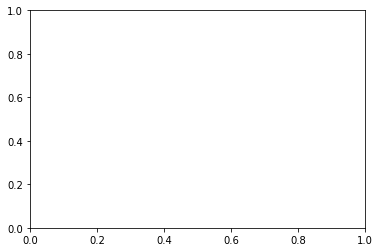

In [104]:

import matplotlib.pyplot as plt
plt.contourf(X, Y, count_list, 14)
#plt.contourf(X, Y, Fidelity_list2, 15)
cbar=plt.colorbar()
cbar.set_label('Fidelity', size=15)
plt.xlabel("alpha", color="black",size=14)
plt.ylabel("phi", color='black',size=14)
#plt.savefig('contour_AD.png', dpi=600)
plt.show()